In [16]:
# Подгрузим пакеты и импортируем данные 
# (данные ранее были разбиты на обучающую и тестовую выборку, так что у меня это будут два разных файла)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

data_train = pd.read_csv('C:/Users/nksto/Downloads/train_df.csv')
data_train.head()

,domain,country_code,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,num_exits,b_round_raised_amount_usd,ipo_money_raised_usd,is_tech,b_round_age,ipo_age,acquired_age,target
0,1,0,0.0,0.0,2017.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
1,1,1,0.0,0.0,2017.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0
2,1,1,0.0,0.0,2014.0,0.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0
3,1,0,1.0,0.0,2018.0,2018.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0
4,1,1,0.0,0.0,2013.0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0


In [18]:
# Примений стандартизацию, для kNN это особенно актуально
from sklearn import preprocessing
a = preprocessing.StandardScaler()
data_train_st = a.fit_transform(data_train)
data_train_st = pd.DataFrame(data_train_st, columns = ['domain', 'country_code', 'num_funding_rounds', 'total_funding_usd',
       'founded_on', 'last_funding_on', 'closed_on', 'employee_count',
       'num_exits', 'b_round_raised_amount_usd', 'ipo_money_raised_usd',
       'is_tech', 'b_round_age', 'ipo_age', 'acquired_age', 'target'])
data_train_st.head()

,domain,country_code,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,num_exits,b_round_raised_amount_usd,ipo_money_raised_usd,is_tech,b_round_age,ipo_age,acquired_age,target
0,0.141175,-1.199570,-0.472264,-0.045957,0.630856,-0.660829,-0.114237,-1.350539,-0.014399,-0.046311,-0.022113,-1.214444,-0.133669,-0.067655,-0.168628,-0.254234
1,0.141175,0.833632,-0.472264,-0.045957,0.630856,-0.660829,-0.114237,-0.444267,-0.014399,-0.046311,-0.022113,0.823422,-0.133669,-0.067655,-0.168628,-0.254234
2,0.141175,0.833632,-0.472264,-0.045957,-0.608880,-0.660829,-0.114237,-0.444267,-0.014399,-0.046311,-0.022113,-1.214444,-0.133669,-0.067655,-0.168628,-0.254234
3,0.141175,-1.199570,0.309556,-0.045957,1.044101,1.513135,-0.114237,-0.444267,-0.014399,-0.046311,-0.022113,-1.214444,-0.133669,-0.067655,-0.168628,-0.254234
4,0.141175,0.833632,-0.472264,-0.045957,-1.022126,-0.660829,-0.114237,-1.350539,-0.014399,-0.046311,-0.022113,0.823422,-0.133669,-0.067655,-0.168628,-0.254234


In [19]:
X = data_train_st.drop('target', axis = 1)
y = data_train['target']

In [5]:
X.shape, y.shape

((316566, 15), (316566,))

In [6]:
# Сделаем то же самое для тестовой выборки
data_test = pd.read_csv('C:/Users/nksto/Downloads/test_df.csv')
data_test[data_test.target == 1].shape
data_test_st = a.fit_transform(data_test)
data_test_st = pd.DataFrame(data_test_st, columns = ['domain', 'country_code', 'num_funding_rounds', 'total_funding_usd',
       'founded_on', 'last_funding_on', 'closed_on', 'employee_count',
       'num_exits', 'b_round_raised_amount_usd', 'ipo_money_raised_usd',
       'is_tech', 'b_round_age', 'ipo_age', 'acquired_age', 'target'])
X_t = data_test_st.drop('target', axis = 1)
y_t = data_test['target']

##### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Сначала посмотрим модель без весов (по дефолту)
knn_1 = KNeighborsClassifier()

In [49]:
# Здесь будем пробовать разное количество соседей
knn_params = {'n_neighbors':[6,7,8,9]}

In [46]:
# Посмотрим f1
knn_grid = GridSearchCV(knn_1, knn_params, scoring ='f1', cv = 5, n_jobs = 8 )
knn_grid.fit(X, y)
knn_grid.best_score_, knn_grid.best_params_
# Здесь приведены результаты для пробных гиперпараметров
# (0.9473146277233111, {'n_neighbors': 5}) смотрела 5, 10, 50
# (0.9456934645649199, {'n_neighbors': 8}) смотрела 2, 4, 6, 8
# (0.9473618124829409, {'n_neighbors': 7}) смотрела 6, 7, 8, 9

In [ ]:
# Посмотрим roc-auc
knn_params = {'n_neighbors':[558, 559, 560, 561]}  # Вставила сюда итоговый кусочек, чтобы код прогонялся целиком
knn_grid = GridSearchCV(knn_1, knn_params, scoring ='roc_auc', cv = 5, n_jobs = 8 )
knn_grid.fit(X, y)
knn_grid.best_score_, knn_grid.best_params_
# Здесь приведены результаты для пробных гиперпараметров
# (0.9831489208316201, {'n_neighbors': 556}) смотрела 554, 555, 556
# (0.9831802808572245, {'n_neighbors': 558}) смотрела 555, 556, 557, 558
# (0.9831802808572245, {'n_neighbors': 558}) смотрела 558, 559, 560, 561

In [39]:
# Теперь добавим веса
knn_w = KNeighborsClassifier(weights = 'distance')

In [ ]:
# Посмотрим f1
knn_params = {'n_neighbors':[6,7,8,9]}
knn_grid = GridSearchCV(knn_w, knn_params, scoring ='f1', cv = 5, n_jobs = 8 )
knn_grid.fit(X, y)
knn_grid.best_score_, knn_grid.best_params_
# Здесь приведены результаты для пробных гиперпараметров
# (0.9441136545687616, {'n_neighbors': 6}) смотрела 6, 7, 8, 9 
# (0.9441136545687616, {'n_neighbors': 6}) смотрела 4, 5, 6, 7

In [50]:
# Посмотрим roc-auc
knn_params = {'n_neighbors':[558, 559, 560, 561]} 
knn_grid = GridSearchCV(knn_w, knn_params, scoring ='roc_auc', cv = 5, n_jobs = 8 )
knn_grid.fit(X, y)
knn_grid.best_score_, knn_grid.best_params_
# Здесь приведены результаты для пробных гиперпараметров
# 0.9792722342793798, {'n_neighbors': 558} смотрела 556, 557, 558, 559

In [24]:
# Посмотрим на модель с весами и 6 соседями
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
knn_f1_w = KNeighborsClassifier(n_neighbors = 6, weights = 'distance', n_jobs = 8)
knn_f1_w.fit(X, y)
knn_f1_w_pred = knn_f1_w.predict(X_t)

print(accuracy_score(y_t, knn_f1_w_pred))  # 0.9936600898390857
print(f1_score(y_t, knn_f1_w_pred))  # 0.9466974743048362
print(roc_auc_score(y_t, knn_f1_w_pred))  # 0.9610668697590607

0.9939159606527549
0.9489097564857553
0.9627301151061278


In [ ]:
# Можно также посмотреть модель без весов с 7 соседями
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
knn_f1_w = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', n_jobs = 8)
knn_f1_w.fit(X, y)
knn_f1_w_pred = knn_f1_w.predict(X_t)

print(accuracy_score(y_t, knn_f1_w_pred))  # 0.9939159606527549
print(f1_score(y_t, knn_f1_w_pred))  # 0.9489097564857553
print(roc_auc_score(y_t, knn_f1_w_pred))  # 0.9627301151061278

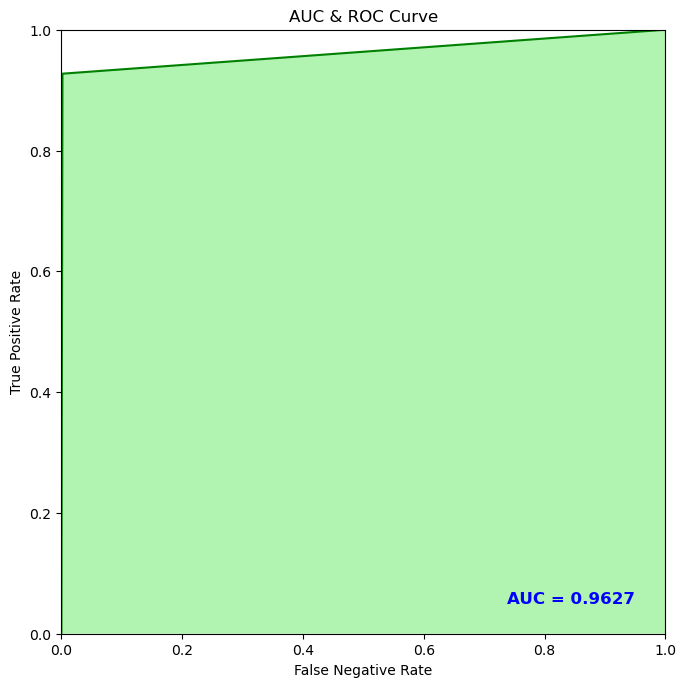

In [25]:
# Построим график roc-auc
auc = roc_auc_score(y_t, knn_f1_w_pred)
from sklearn import metrics
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_t, knn_f1_w_pred)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Negative Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# KNN итог на кросс-валидации
#        f1       7  0.9483462370293397
#        roc-auc 558 0.9831802808572245
#weights f1       6  0.9441136545687616
#weights roc-auc 558 0.9792722342793798

# KNN итог на тестовой выборке с весами и 6 соседями
# accuracy 0.9936600898390857
# f1       0.9466974743048362
# roc-auc  0.9610668697590607

##### Random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt')

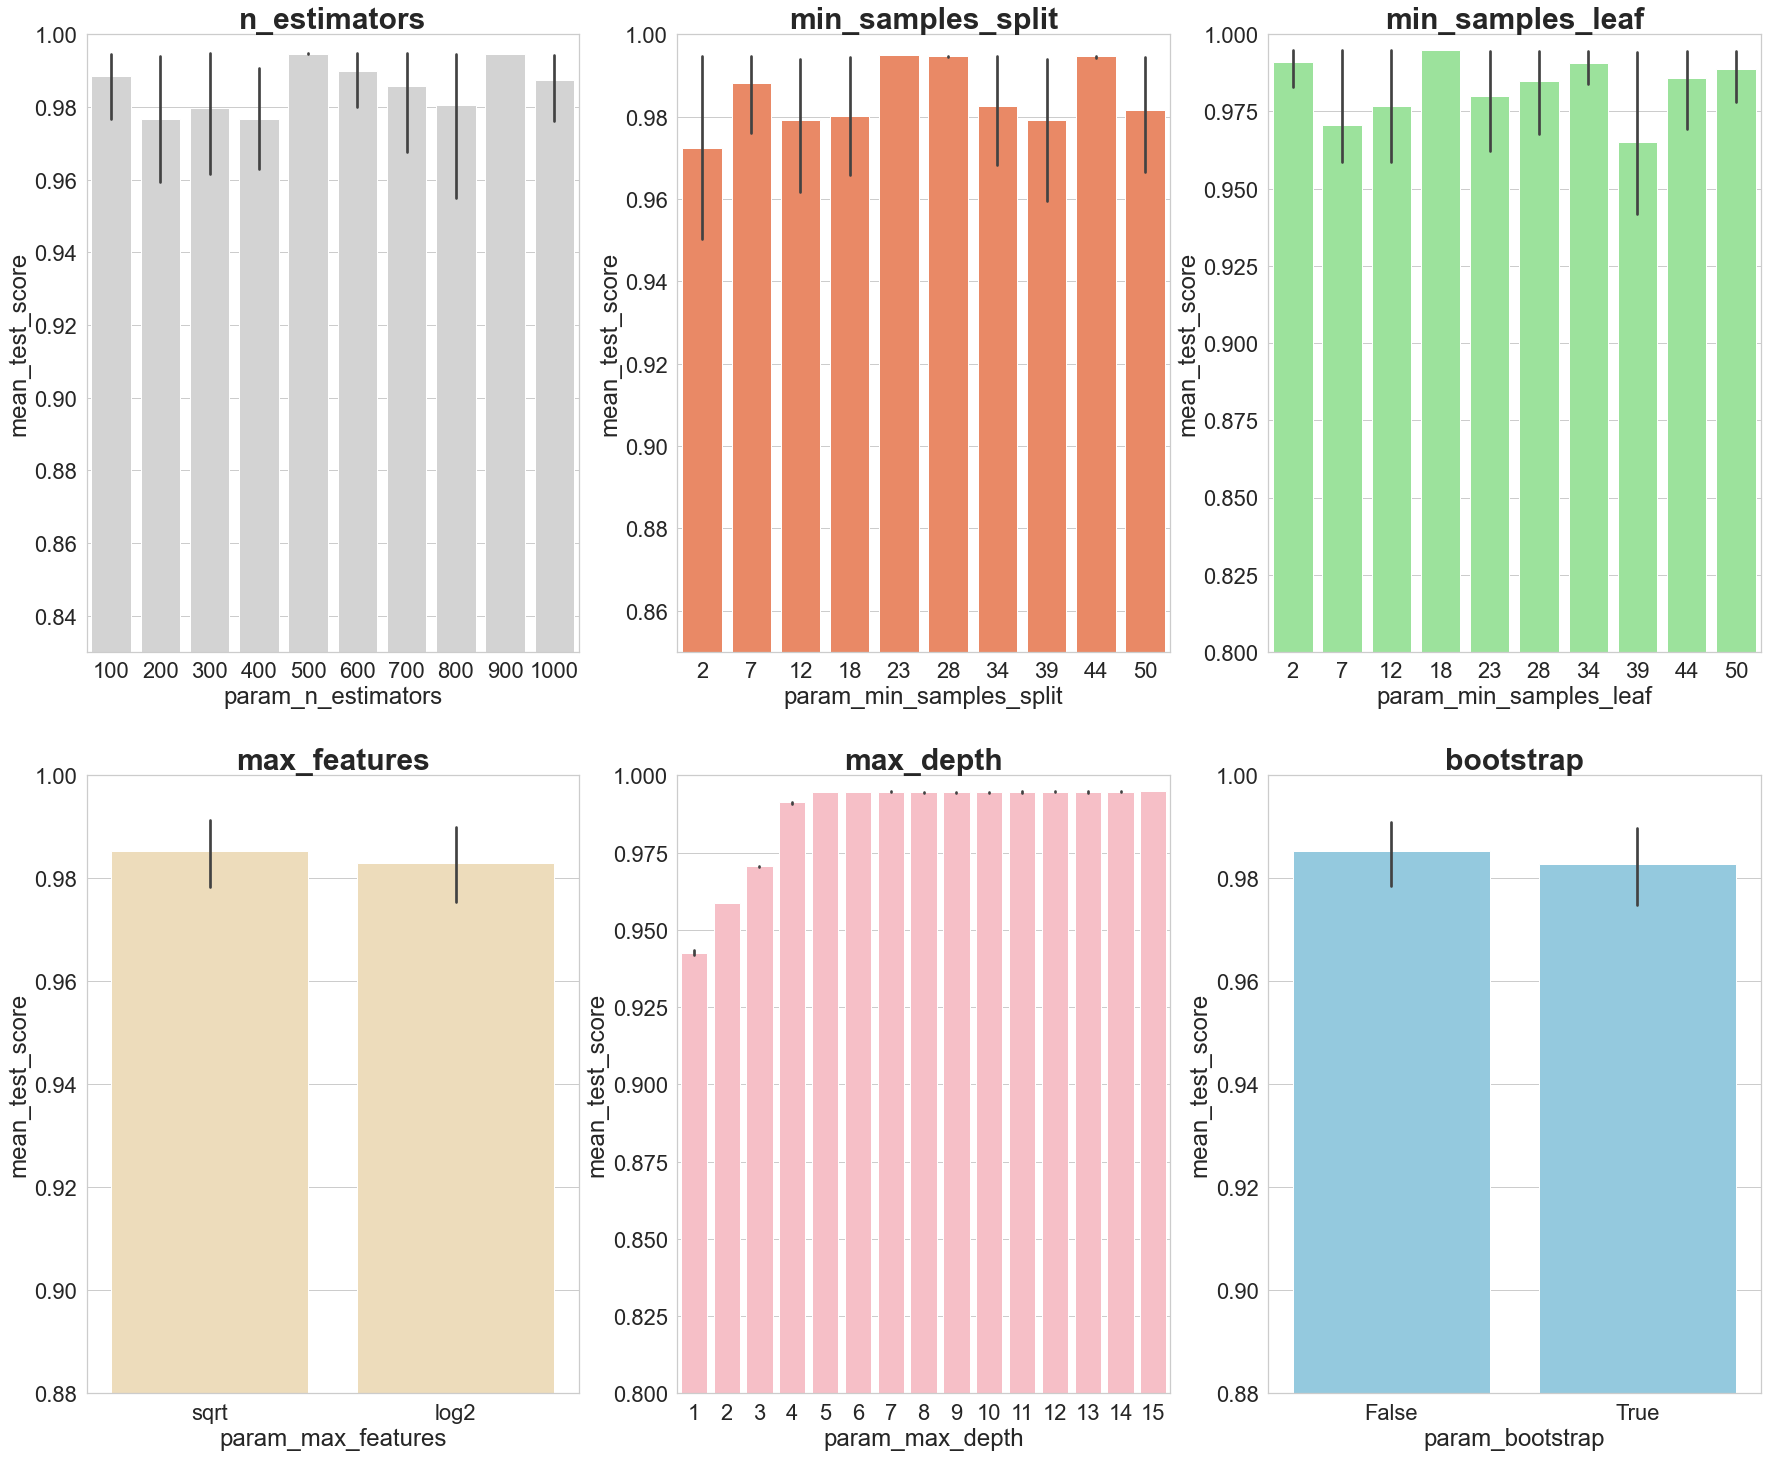

In [81]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rf, 
                        param_dist, 
                        n_iter = 50,
                        cv = 5, 
                        verbose = 1, 
                        n_jobs = 8, 
                        random_state = 0)
rs.fit(X, y)
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
#import seaborn as sns
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,1]),axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,1]),axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,1]),axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.88,1]),axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,1]),axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.88,1])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [82]:
n_estimators = [500,900]
max_features = ['sqrt']
max_depth = [5,6,15]
min_samples_split = [23,28,44]
min_samples_leaf = [17,18,19]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rf, param_grid, cv = 5, verbose = 1, n_jobs=8)
gs.fit(X, y)
rf_1 = gs.best_estimator_
gs.best_params_
'''bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 17,
 'min_samples_split': 23,
 'n_estimators': 900'''

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 17,
 'min_samples_split': 23,
 'n_estimators': 900}

In [14]:
n_estimators = [850,900,950]
max_features = ['sqrt']
max_depth = [15]
min_samples_split = [21,23,25]
min_samples_leaf = [16,17]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rf, param_grid, cv = 5, verbose = 1, n_jobs=8)
gs.fit(X, y)
rf_1 = gs.best_estimator_
gs.best_params_
'''{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 16,
 'min_samples_split': 25,
 'n_estimators': 850}'''

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 16,
 'min_samples_split': 25,
 'n_estimators': 850}

In [15]:
n_estimators = [860,875,890]
max_features = ['sqrt']
max_depth = [15]
min_samples_split = [24,25]
min_samples_leaf = [14,15,16]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rf, param_grid, cv = 5, verbose = 1, n_jobs=8)
gs.fit(X, y)
rf_1 = gs.best_estimator_
gs.best_params_
'''{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 25,
 'n_estimators': 875}'''

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 25,
 'n_estimators': 875}

In [16]:
n_estimators = [865,875,885]
max_features = ['sqrt']
max_depth = [15]
min_samples_split = [25,26]
min_samples_leaf = [15]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rf, param_grid, cv = 5, verbose = 1, n_jobs=8)
gs.fit(X, y)
rf_1 = gs.best_estimator_
gs.best_params_
'''{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 25,
 'n_estimators': 865}'''

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 25,
 'n_estimators': 865}

In [29]:
# Ещё проверим, не лучше ли использовать Энтропию вместо Джини
n_estimators = [865,866,867,868,869]
criterion = ['gini','entropy']
max_features = ['sqrt']
max_depth = [15]
min_samples_split = [25]
min_samples_leaf = [15]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rf, param_grid, cv = 5, verbose = 1, n_jobs=8)
gs.fit(X, y)
rf_1 = gs.best_estimator_
gs.best_params_
'''{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 25,
 'n_estimators': 867}'''

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 25,
 'n_estimators': 867}

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
rf_1 = RandomForestClassifier(n_estimators = 867, max_depth = 15, max_features = 'sqrt', criterion = 'gini',
                              min_samples_leaf = 15, min_samples_split = 25, bootstrap = False, n_jobs = 8)
rf_1.fit(X, y)
rf_1_pred = rf_1.predict(X_t)

print(accuracy_score(y_t, rf_1_pred))  # 0.9948067701521958
print(f1_score(y_t, rf_1_pred))  # 0.9567003792667509
print(roc_auc_score(y_t, rf_1_pred))  # 0.9698941725235276

0.9948067701521958
0.9567003792667509
0.9698941725235276


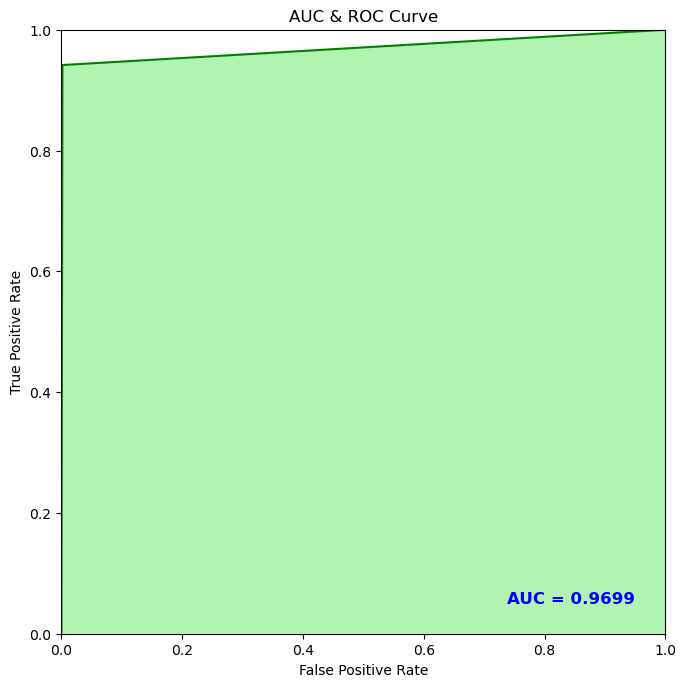

In [31]:
# Построим график roc-auc
auc = roc_auc_score(y_t, rf_1_pred)
from sklearn import metrics
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_t, rf_1_pred)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# RF итог на тестовой выборке
# accuracy 0.9948067701521958
# f1       0.9567003792667509
# roc-auc  0.9698941725235276